In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving car_evaluation.csv to car_evaluation.csv


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df=pd.read_csv('car_evaluation.csv', header=None)

In [ ]:
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [ ]:
df.shape

(1728, 7)

In [ ]:
col_names=['buying','maint','doors','persons','lug_boot','safety','class']

df.columns= col_names

col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [ ]:
df

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [ ]:
df.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


In [ ]:
col_names=['buying','maint','doors','persons','lug_boot','safety','class']

for col in col_names:
    print(df[col].value_counts())

buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
maint
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64
persons
2       576
4       576
more    576
Name: count, dtype: int64
lug_boot
small    576
med      576
big      576
Name: count, dtype: int64
safety
low     576
med     576
high    576
Name: count, dtype: int64
class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [ ]:
df.isnull().sum()

,0
buying,0
maint,0
doors,0
persons,0
lug_boot,0
safety,0
class,0


In [ ]:
X= df.drop(['class'],axis=1)
y=df['class']

Sk Learn library to Divide data

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.33,random_state=42)

33% data in testing

In [ ]:
X_train.shape, X_test.shape

((1157, 6), (571, 6))

TO check data is normalize or not

In [ ]:
X_train.dtypes

,0
buying,object
maint,object
doors,object
persons,object
lug_boot,object
safety,object


To install Category_Encoders using pip install category_encoders

In [ ]:
pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 3.7 MB/s eta 0:00:00


In [ ]:
import category_encoders as ce

In [ ]:
encoder=ce.OrdinalEncoder(cols=['buying','maint','doors','persons','lug_boot','safety'])


X_train = encoder.fit_transform (X_train)

X_test = encoder.transform(X_test)

In [ ]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,1,1,1,1,1,1
468,2,1,1,2,2,1
155,1,2,1,1,2,2
1721,3,3,2,1,2,2
1208,4,3,3,1,2,2


In [ ]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,2,2,4,3,1,2
1201,4,3,3,2,1,3
628,2,2,2,3,3,3
1498,3,2,2,2,1,3
1263,4,3,4,1,1,1


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf_gini =DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=0)

clf_gini.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [ ]:
y_pred_gini=clf_gini.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}',format(accuracy_score(y_test,y_pred_gini)))

Model accuracy score with criterion gini index: {0:0.4f} 0.8021015761821366


In [ ]:
y_pred_train_gini=clf_gini.predict(X_train)


y_pred_train_gini

array(['unacc', 'unacc', 'unacc', ..., 'unacc', 'unacc', 'acc'],
      dtype=object)

In [ ]:
print('Training set accuracy score : {0:0.4f}',format(accuracy_score(y_train,y_pred_train_gini)))

Training set accuracy score : {0:0.4f} 0.7865168539325843


[Text(0.4, 0.875, 'x[5] <= 1.5\ngini = 0.455\nsamples = 1157\nvalue = [255, 49, 813, 40]'),
 Text(0.2, 0.625, 'gini = 0.0\nsamples = 386\nvalue = [0, 0, 386, 0]'),
 Text(0.30000000000000004, 0.75, 'True  '),
 Text(0.6, 0.625, 'x[3] <= 2.5\ngini = 0.577\nsamples = 771\nvalue = [255, 49, 427, 40]'),
 Text(0.5, 0.75, '  False'),
 Text(0.4, 0.375, 'x[0] <= 2.5\ngini = 0.631\nsamples = 525\nvalue = [255.0, 49.0, 181.0, 40.0]'),
 Text(0.2, 0.125, 'gini = 0.496\nsamples = 271\nvalue = [124, 0, 147, 0]'),
 Text(0.6, 0.125, 'gini = 0.654\nsamples = 254\nvalue = [131, 49, 34, 40]'),
 Text(0.8, 0.375, 'gini = 0.0\nsamples = 246\nvalue = [0, 0, 246, 0]')]

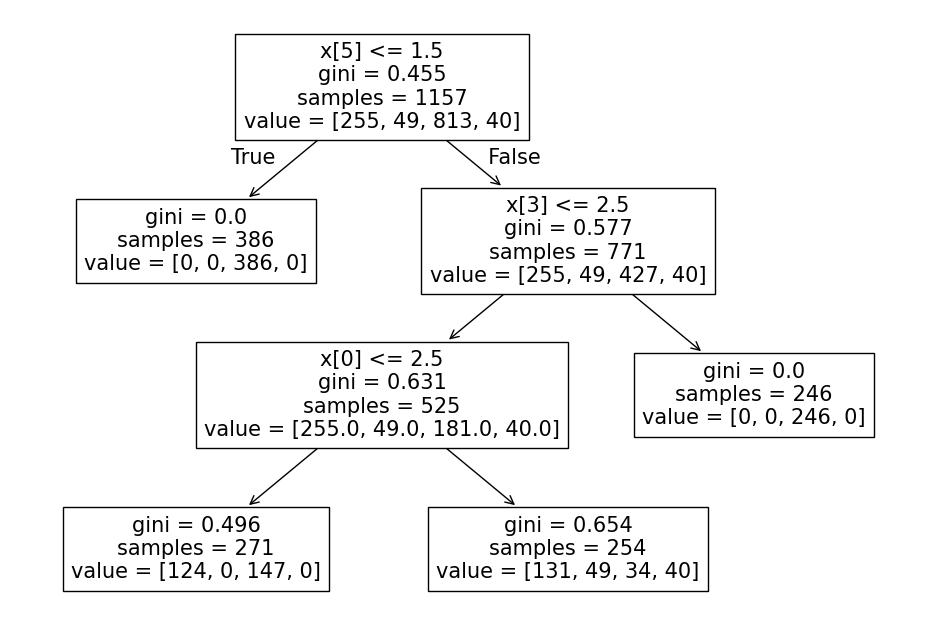

In [ ]:
plt.figure(figsize=(12,8))

from sklearn import tree
tree.plot_tree(clf_gini.fit(X_train,y_train))

In [ ]:
pip install graphviz

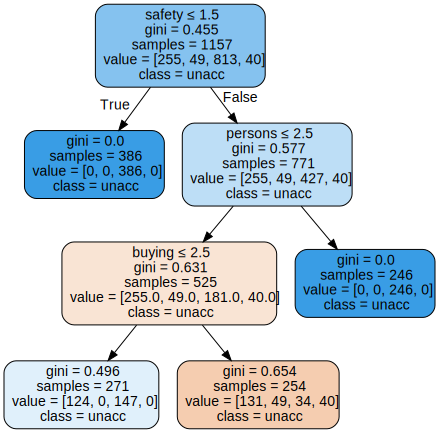

In [ ]:
import graphviz
dot_data = tree.export_graphviz(clf_gini, out_file=None, feature_names=X_train.columns, class_names=y_train, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [ ]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [ ]:
y_pred_en = clf_en.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.8021


In [ ]:
y_pred_train_en = clf_en.predict(X_train)

y_pred_train_en

array(['unacc', 'unacc', 'unacc', ..., 'unacc', 'unacc', 'acc'],
      dtype=object)

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.7865


In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.7865
Test set score: 0.8021


[Text(0.4, 0.875, 'x[5] <= 1.5\nentropy = 1.2\nsamples = 1157\nvalue = [255, 49, 813, 40]'),
 Text(0.2, 0.625, 'entropy = 0.0\nsamples = 386\nvalue = [0, 0, 386, 0]'),
 Text(0.30000000000000004, 0.75, 'True  '),
 Text(0.6, 0.625, 'x[3] <= 2.5\nentropy = 1.474\nsamples = 771\nvalue = [255, 49, 427, 40]'),
 Text(0.5, 0.75, '  False'),
 Text(0.4, 0.375, 'x[0] <= 2.5\nentropy = 1.638\nsamples = 525\nvalue = [255.0, 49.0, 181.0, 40.0]'),
 Text(0.2, 0.125, 'entropy = 0.995\nsamples = 271\nvalue = [124, 0, 147, 0]'),
 Text(0.6, 0.125, 'entropy = 1.759\nsamples = 254\nvalue = [131, 49, 34, 40]'),
 Text(0.8, 0.375, 'entropy = 0.0\nsamples = 246\nvalue = [0, 0, 246, 0]')]

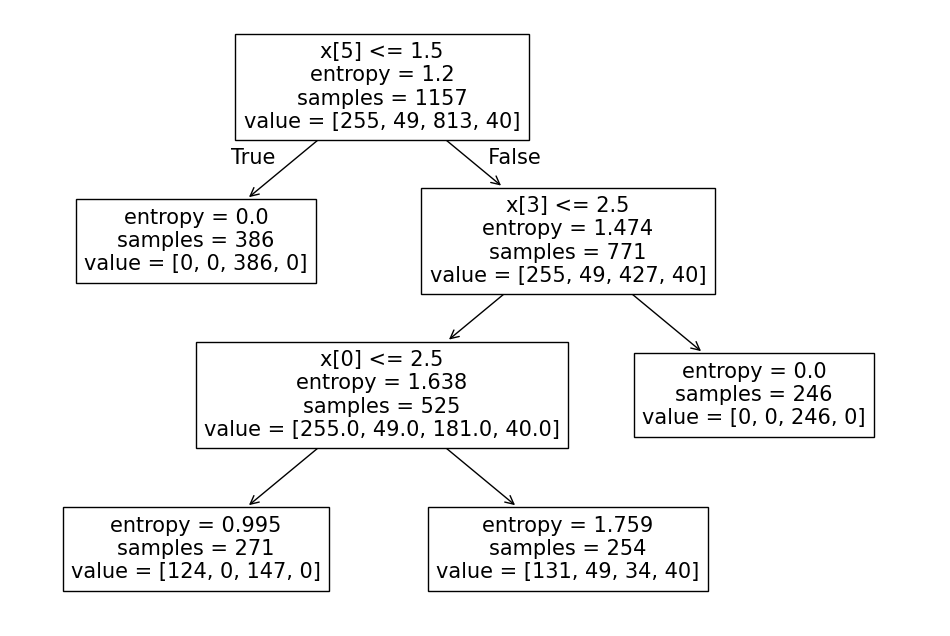

In [ ]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train))

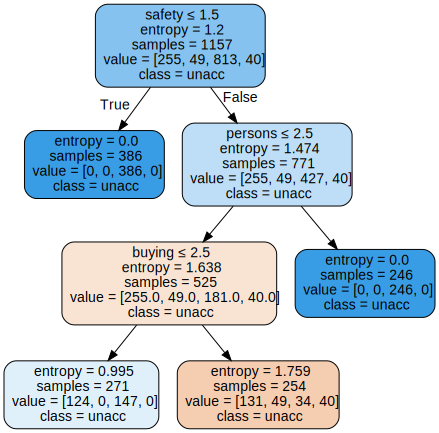

In [ ]:
import graphviz
dot_data = tree.export_graphviz(clf_en, out_file=None,
                              feature_names=X_train.columns,
                              class_names=y_train,
                              filled=True, rounded=True,
                              special_characters=True)

graph = graphviz.Source(dot_data)

graph

In [ ]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[ 73   0  56   0]
 [ 20   0   0   0]
 [ 12   0 385   0]
 [ 25   0   0   0]]
